In [35]:
import numpy as np
import xarray as xr


import matplotlib.pyplot as plt
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import datetime
import matplotlib.patches as mpatches


import matplotlib.ticker as ticker
plt.rcParams['font.family'] = 'Arial'
#plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
textfontsize = 12
labelfontsize = 16

In [20]:
import cartopy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter,LatitudeLocator

In [28]:
sst_roi_corr=xr.open_dataarray('corr_Obs_ROI_Global.nc')
print(sst_roi_corr.shape)
today=datetime.date.today()

names=["DSSmain"]
dsslat=[-66.769722]
dsslon=[112.806944]



(89, 180)


In [29]:
def breakfit_fun(x):
    return np.where(x<1918,-8.485,-8.485-0.004*(x-1918))


amoc_sg_grid=np.loadtxt('AMOC_sg_grid.txt',skiprows=1)
amoc_gs_grid=np.loadtxt('AMOC_gulfstream_grid.txt',skiprows=1)
output_amoc_smooth=np.loadtxt('output_amoc_Gaussian_0_599.txt',skiprows=1)
output_amoc=np.loadtxt('output_amoc_Gaussian_14_97.txt',skiprows=1)

amoc_breakfit=np.ones_like(output_amoc_smooth)
amoc_breakfit[:,0]=output_amoc[:,0]
amoc_breakfit[:,1]=breakfit_fun(amoc_breakfit[:,0])


amoc_gs_grid_xs=amoc_gs_grid[:,0]
amoc_gs_grid_ys=amoc_gs_grid[:,1]

lats=np.arange(0.5,89.5,1)
lons=np.arange(-90.5,60.5,1)

amoc_mask=xr.DataArray(np.zeros((len(lats),len(lons))),coords=[('lat',lats),('lon',lons)])
for cc in amoc_gs_grid:
    x=cc[0]
    y=cc[1]
    amoc_mask.loc[x,y]=1

for cc in amoc_sg_grid:
    x=cc[0]
    y=cc[1]
    amoc_mask.loc[x,y]=1

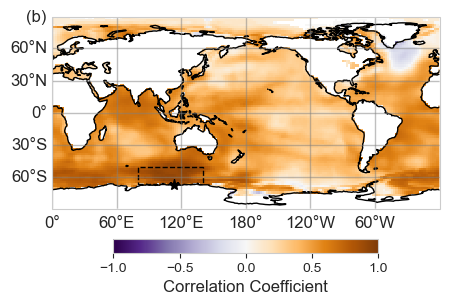

In [64]:
#AMOC panel
proj = ccrs.PlateCarree(central_longitude=180)
fig,ax=plt.subplots(1,1,subplot_kw=dict(projection=proj),figsize=(5,4))

cs1 = ax.pcolormesh(sst_roi_corr.lon, sst_roi_corr.lat, sst_roi_corr, vmin=-1.0, vmax=1.0, antialiased=True, transform=ccrs.PlateCarree(),cmap='PuOr_r')
cb1 = plt.colorbar(cs1,ax=ax,fraction=0.043, pad=0.1, orientation='horizontal' ,location='bottom',label="Correlation")
cb1.ax.tick_params(labelsize=10)
cb1.set_label(label='Correlation Coefficient',size=12)
#ticklabs = cb.ax.get_yticklabels()
#cb.ax.set_yticklabels(ticklabs, fontsize=18)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, xlocs=[0, 60, 120, 180, -120, -60])
gl.top_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}


ax.add_patch(mpatches.Rectangle(xy=[80, -66], width=60, height=16,
                                    edgecolor='k', fill=False, linestyle='--',
                                    transform=ccrs.PlateCarree()))


ax.plot(dsslon, dsslat, linewidth=2, markersize='8', marker='*',color='black',transform=ccrs.Geodetic())
ax.coastlines()
plt.text(-0.04, 1, '(b)',
     size=labelfontsize,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

plt.savefig('plots/Fig3_b.png'.format(datetime.date.today()),bbox_inches="tight")

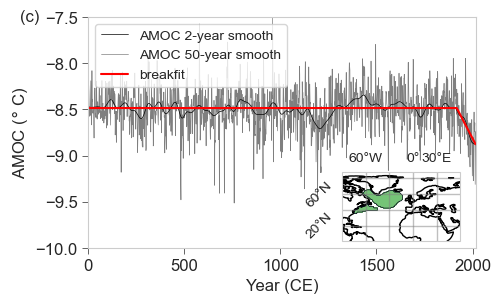

In [58]:
proj=ccrs.PlateCarree()
proj=ccrs.PlateCarree()
fig,ax=plt.subplots(1,1,figsize=(5,3),subplot_kw=dict())

labelfontsize=12
textfontsize=10
ax.plot(output_amoc[:,0],output_amoc[:,1],label='AMOC 2-year smooth',linewidth=0.5,linestyle='-',color='k')
ax.plot(output_amoc_smooth[:,0],output_amoc_smooth[:,1],label='AMOC 50-year smooth',alpha=0.5,linewidth=0.5,linestyle='-',color='k') #smoothed
ax.plot(amoc_breakfit[:,0],amoc_breakfit[:,1],label='breakfit',color='r') #the linear fit thing
ax.set_xlabel('Year (CE)',fontsize=labelfontsize)
ax.set_ylabel('AMOC ($\degree$ C)',fontsize=labelfontsize)
ax.set_xlim(0,2016)
ax.set_ylim(-10.0,-7.5)
ax.grid()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='both',which='major', width=0.50, length=4, labelsize=labelfontsize)

ax1in=inset_axes(ax, width="35%", height="30%", loc="lower right",borderpad=0.5,
                   axes_class=cartopy.mpl.geoaxes.GeoAxes,
                   axes_kwargs=dict(projection=ccrs.PlateCarree()))


cs0 = ax1in.contourf(amoc_mask.lon.values, amoc_mask.lat.values, amoc_mask, transform=ccrs.PlateCarree(),cmap='Greens',levels=(0.9,1))
sigcontour20=ax1in.contour(amoc_mask.lon.values, amoc_mask.lat.values,amoc_mask,transform=ccrs.PlateCarree(),levels=(0.9,1),linewidths=0.5)
gl0 = ax1in.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5 )
gl0.left_labels = True
gl0.bottom_labels = False
gl0.right_labels = False
gl0.xlocator = mticker.FixedLocator([-60, -30,0, 30, 60])
gl0.ylocator = LatitudeLocator()
gl0.xformatter = LongitudeFormatter()
gl0.yformatter = LatitudeFormatter()
gl0.xlabel_style = {'size': 10,}
gl0.ylabel_style = {'size': 10,'rotation': 45}
ax1in.coastlines()

ax.legend(fontsize=textfontsize,loc='upper left')


plt.text(-0.15, 1, '(c)',
     size=labelfontsize,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

plt.savefig('plots/Fig3_c.png'.format(datetime.date.today()),bbox_inches="tight")